# Evaluation terminale : Machine learning & python -- MAILLARD Kylian

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse: C'est le fait d'apprendre à une machine une certaine chose selon un "patern" repéré dans un fichier data (.csv par exemple)

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Réponse: Elle peut etre utilisé dans une utilisation de Computer Vision (ex: repéré un casque de chantier dans une zone définie afin de déclarer une alarme de sécurité)

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse: Les différentes familles sont : "machine learning supervisé" qui, comme son nom l'indique, guide le programme pour choisir une facon de traiter les données. "machine learning non supervisé" cela cherche des groupes d'objets semblable et des similarités des données.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse: Classification : "Apprentissage supervisé" / Clustering : "Apprentissage NON supervisé"

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse: Un arbre de décision permet de visuellement comprendre toutes les possibilitées connecté à l'aide de branche. 

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse: On parle d'overfitting lorsque le modèle de Machine Learning prend trop de données

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [358]:
# packages
import pandas as pd
#...
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



Importez les données comme suit :

In [359]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [360]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse: La colonne qui doit être enlevé est la "3P%" (étant donné que nous avons la même dans "3PA" mais avec un nombre brut et non en %) et/ou "name" .

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [361]:
# On ouvre et on supprime "Name" et "3P%" et print le .csv
data = pd.read_csv('nba_logreg.csv')
data.drop(columns=['Name'],axis=1, inplace=True)
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Réponse: Il manque 11 données dans la colonne "3P%", soit 0.8% (cf exercice 2.2)

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [362]:
# drop columns with > 15% of NaN :
col_todrop1 = []
for col in data.columns:
    p_nan = data[col].isnull().sum()/len(data)
    if p_nan != 0:
        col_todrop1.append(col)
        print(f'{col} : {p_nan * 100} %')
# dropping
data.drop(columns=col_todrop1, axis=1, inplace=True)

3P% : 0.8208955223880596 %


#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [363]:
# model variables definitions
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse: cette étape est nécéssaire pour guider le modèle de machine learning

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [364]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
#criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test


#### Exercice 2.5: Evaluez la qualité du modèle. 

auc : 0.5769609327680193


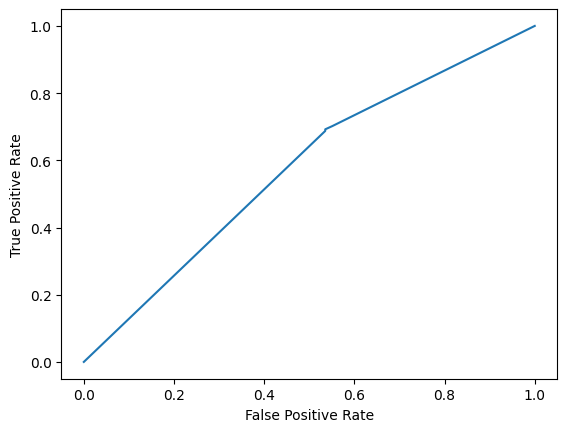

In [365]:
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print('auc : ' + str(auc_))

# ROC curve

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse: La métrique utilisé est la courbe ROC, l'AUC permet de calculet le meilleur modele au sens de ce critere. Les unités sont des True Positive Rate et les False Positive Rate.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse: Non, absolument pas. Le "point de bascule" (environ x=0.6,y=0.7), autrement appelé EER, doit être le plus rapproché du coin haut-gauche pour avoir un taux de TP et FP correct.

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

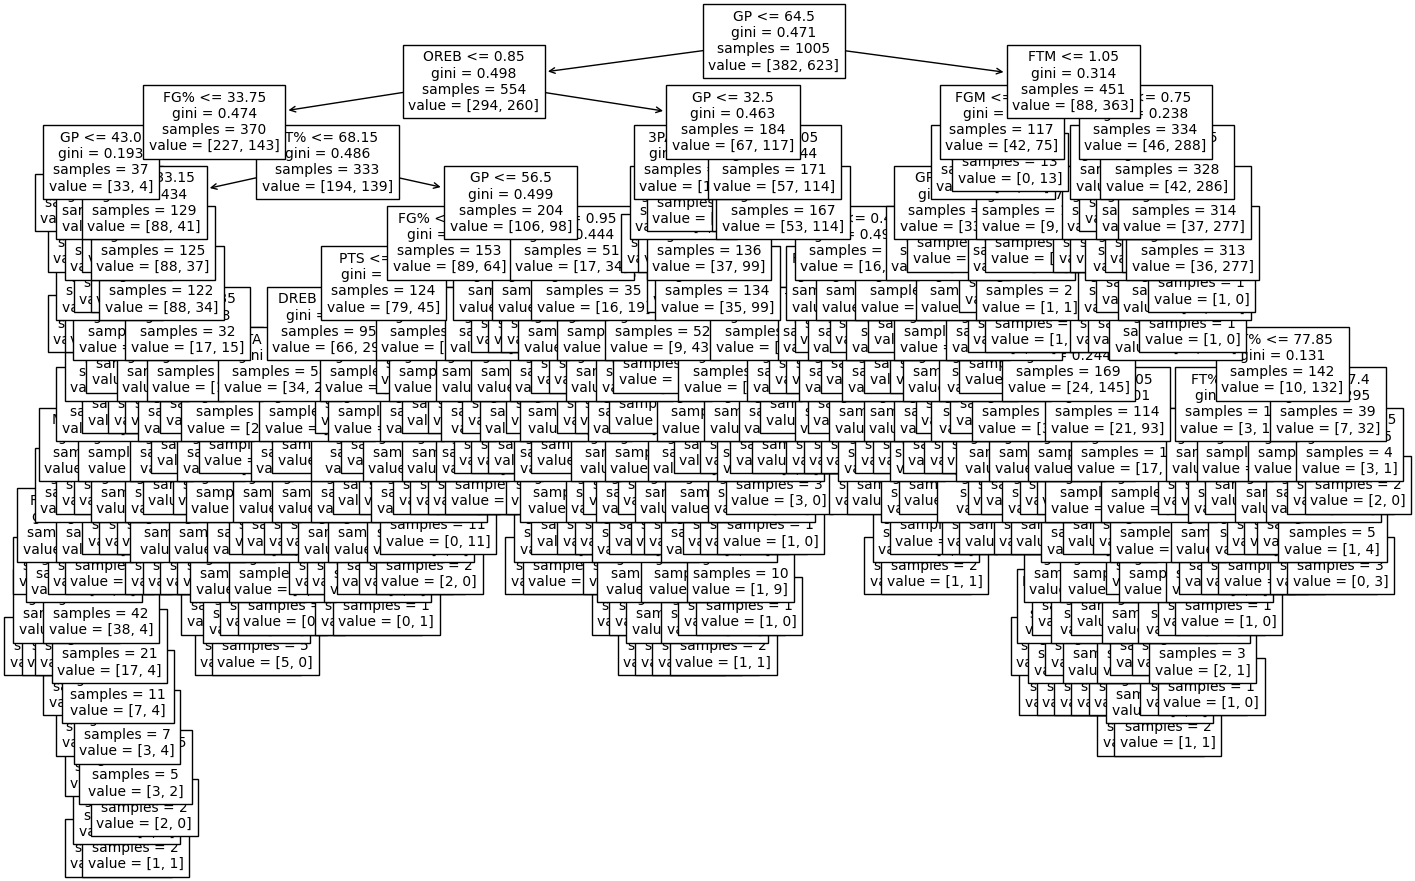

In [366]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse: L'arbre prend trop de valeur et ne s'arrete seulement beaucoup trop loin. Ainsi une lecture est très difficile voir impossible.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse:
    1) Nous pouvons changer les hyper-paramètres
                2) Changer la méthode de programmation 
                3) Nettoyer la base de donnée


#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [367]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416


0.6969639612356149


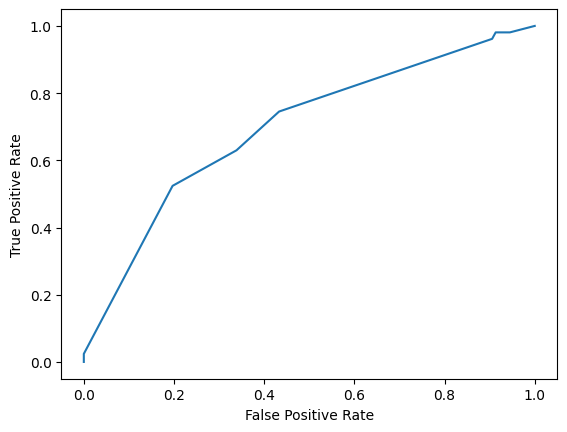

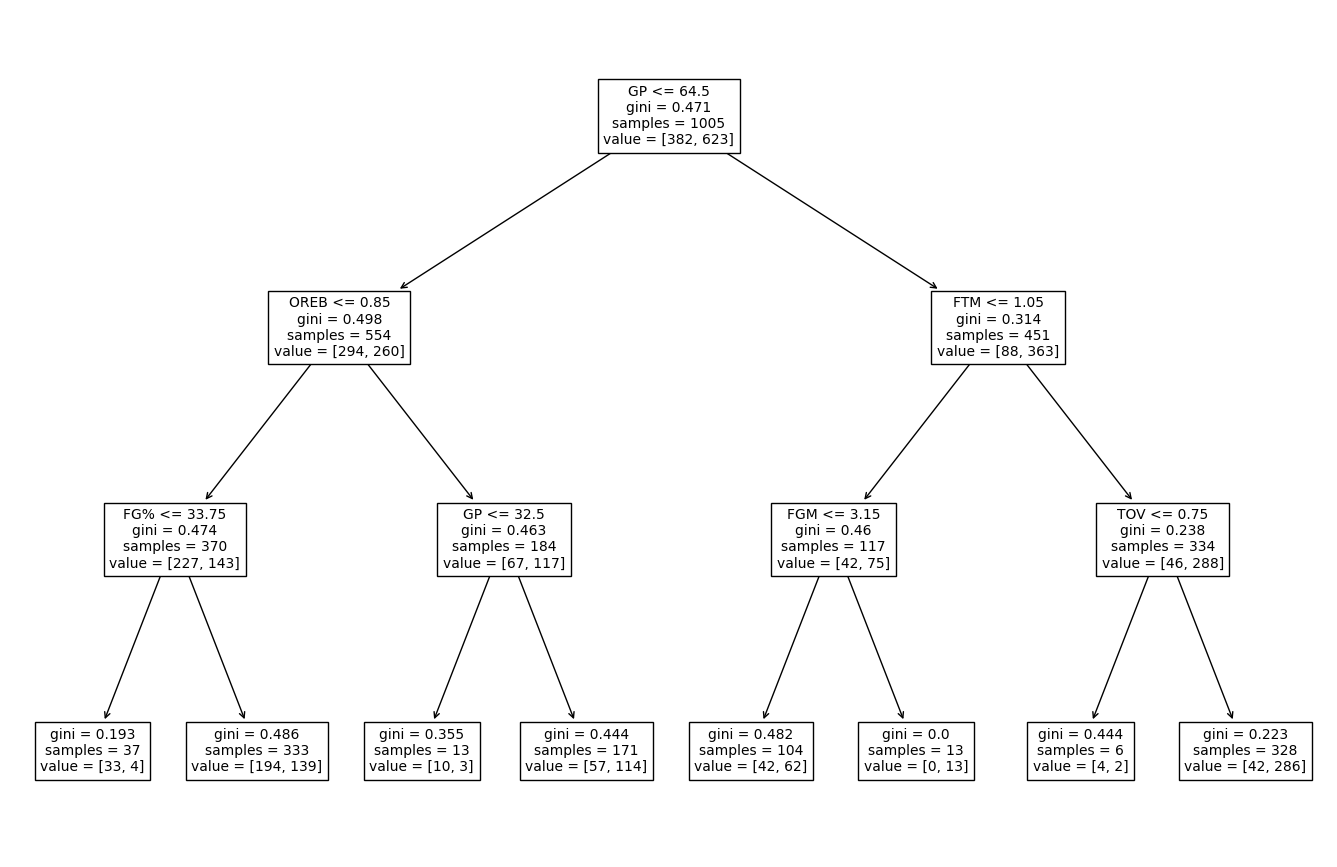

In [368]:
# calling decisiontree classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)
#
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Réponse: Pour conclure, avec une précision d'environ 0.69/69%, que selon les critères visualisés par Matplotlib certains joueurs passeront les 5 prochaines années au sein de la ligue NBA.